<a href="https://colab.research.google.com/github/ballysingh11/pyweather/blob/master/City_wise_list_of_Wellness_Centres(Govt_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('City-wise list of Wellness Centres.csv')
df.head()

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,wellnessCentreAddress,doctorCount,category,wellnessCentreContactNo,longitude,latitude
0,11,DELHI/NCR,AY31,North Avenue (Ayur),NaN,3,ayurvedic,23092794,77.199165,28.618547
1,11,DELHI/NCR,D12,KIDWAI NAGAR,NaN,10,alopathic,NaN,77.203476,28.568200
2,11,DELHI/NCR,D16,Moti Bagh,NaN,5,alopathic,011-24670333,77.178154,28.584455
3,11,DELHI/NCR,D18,Pusa Road,NaN,6,alopathic,"28758071, 28754318",77.189537,28.644466
4,11,DELHI/NCR,D21,Netaji Nagar,NaN,4,alopathic,011-24670222,77.186493,28.572374


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cityCode                 337 non-null    int64  
 1   cityName                 337 non-null    object 
 2   wellnessCentreCode       337 non-null    object 
 3   wellnessCentreName       337 non-null    object 
 4   wellnessCentreAddress    0 non-null      float64
 5   doctorCount              337 non-null    int64  
 6   category                 337 non-null    object 
 7   wellnessCentreContactNo  284 non-null    object 
 8   longitude                337 non-null    float64
 9   latitude                 337 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 26.5+ KB


In [79]:
df = df.drop(['wellnessCentreAddress','wellnessCentreCode'], axis = 1)

In [80]:
df.isna().sum()

cityCode                    0
cityName                    0
wellnessCentreName          0
doctorCount                 0
category                    0
wellnessCentreContactNo    53
longitude                   0
latitude                    0
dtype: int64

In [81]:
df = df.dropna(subset =['wellnessCentreContactNo'])

In [82]:
df.isna().sum().sum()

0

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cityCode,284.0,140.137324,223.377034,11.000000,11.000000,22.000000,121.000000,761.000000
doctorCount,284.0,4.478873,2.421104,1.000000,3.000000,4.000000,6.000000,14.000000
longitude,284.0,78.547963,4.312075,72.476913,77.115223,77.242184,80.123699,94.091904
latitude,284.0,24.168429,5.371565,8.533119,19.214904,26.471874,28.608240,32.722720


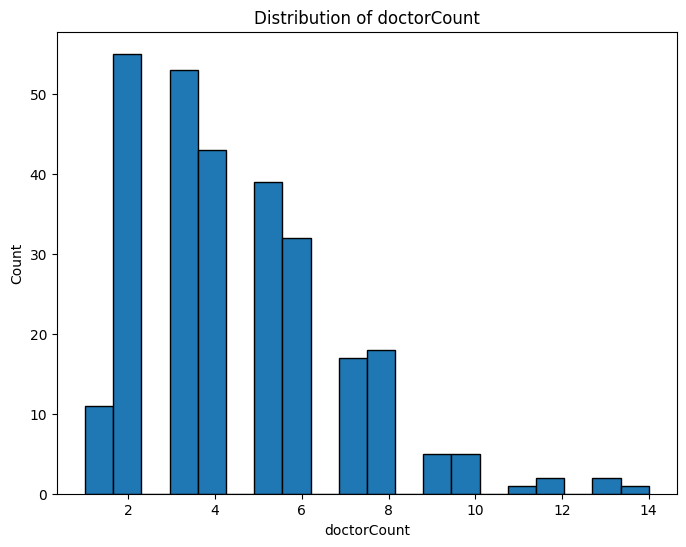

In [84]:
plt.figure(figsize=(8, 6))
plt.hist(df['doctorCount'], bins=20, edgecolor='black')
plt.title('Distribution of doctorCount')
plt.xlabel('doctorCount')
plt.ylabel('Count')
plt.show()

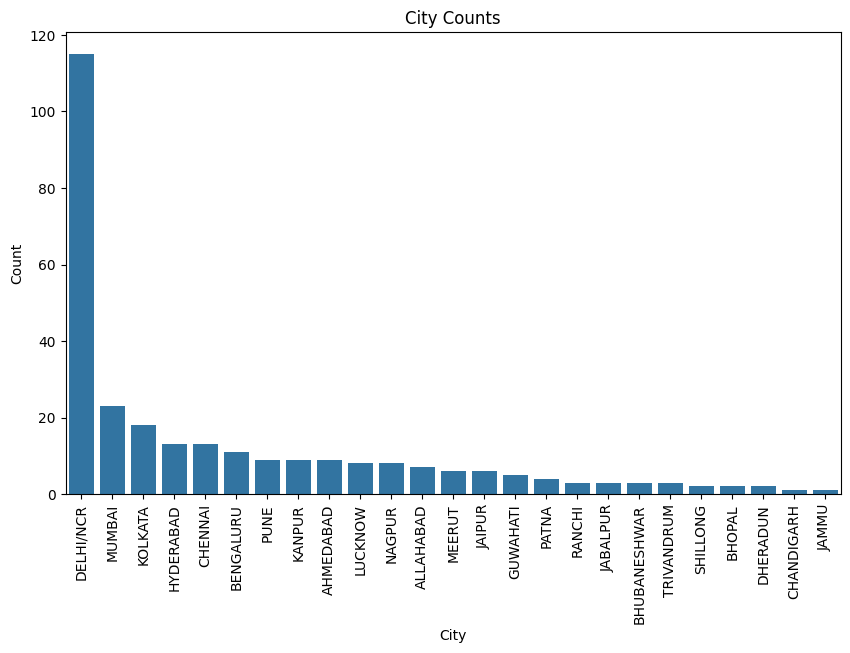

In [85]:
# Categorical data visualization
# Bar plot of city counts
city_counts = df['cityName'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('City Counts')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

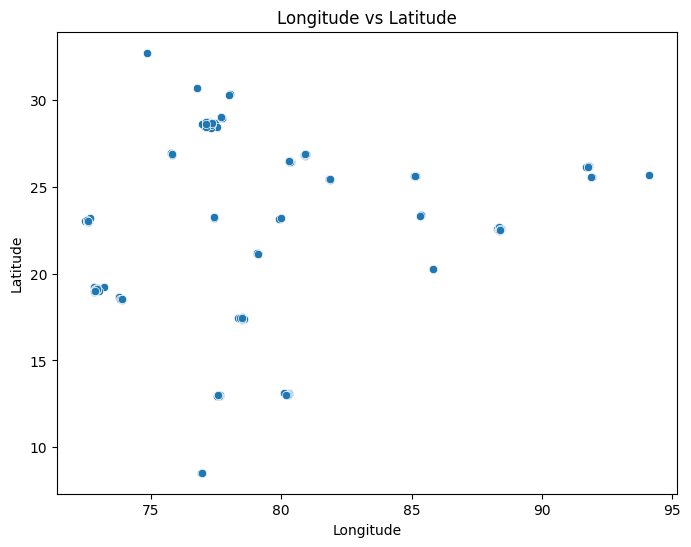

In [86]:
# Relationship between numerical variables
# Scatter plot of longitude vs latitude
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', data=df)
plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [87]:
# Unique values in categorical features
print("Unique values in 'cityName':", df['cityName'].unique())
print("Unique values in 'category':", df['category'].unique())

Unique values in 'cityName': ['DELHI/NCR' 'MEERUT' 'PUNE' 'MUMBAI' 'KOLKATA' 'HYDERABAD' 'CHENNAI'
 'KANPUR' 'LUCKNOW' 'ALLAHABAD' 'PATNA' 'BHUBANESHWAR' 'JABALPUR'
 'BENGALURU' 'JAIPUR' 'CHANDIGARH' 'GUWAHATI' 'SHILLONG' 'NAGPUR' 'BHOPAL'
 'AHMEDABAD' 'DHERADUN' 'JAMMU' 'RANCHI' 'TRIVANDRUM']
Unique values in 'category': ['ayurvedic' 'alopathic' 'homeo' 'unani']


In [88]:
# Correlation analysis
numeric_data = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
print(corr_matrix)

             cityCode  doctorCount  longitude  latitude
cityCode     1.000000    -0.142695   0.378949 -0.080167
doctorCount -0.142695     1.000000  -0.047468  0.071891
longitude    0.378949    -0.047468   1.000000  0.004993
latitude    -0.080167     0.071891   0.004993  1.000000


In [89]:
# Value counts for categorical features
print("Value counts for 'category':")
print(df['category'].value_counts())

Value counts for 'category':
category
alopathic    256
ayurvedic     13
homeo         10
unani          5
Name: count, dtype: int64


In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Separate the target variable (if applicable)
# Assuming 'doctorCount' is the target variable
X = df.drop('doctorCount', axis=1)
y = df['doctorCount']

In [91]:
# Encode categorical variables
categorical_cols = ['cityName', 'category']

# Label encoding for categorical variables
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [92]:
df.head(3)

,cityCode,cityName,wellnessCentreName,doctorCount,category,wellnessCentreContactNo,longitude,latitude
0,11,DELHI/NCR,North Avenue (Ayur),3,ayurvedic,23092794,77.199165,28.618547
2,11,DELHI/NCR,Moti Bagh,5,alopathic,011-24670333,77.178154,28.584455
3,11,DELHI/NCR,Pusa Road,6,alopathic,"28758071, 28754318",77.189537,28.644466


In [97]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['cityName', 'category']  # List of categorical column names


encoder = OneHotEncoder(sparse=False)

X_encoded = encoder.fit_transform(df[categorical_cols])

X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

X = pd.concat([df.drop(categorical_cols, axis=1), X_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
model = LinearRegression()

In [102]:
model.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = model.predict(X_test)

In [104]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.2412772670508353e+25
R-squared: -2.468121077508057e+24
